# Questão 3

<img src="q3f_color.png" width="300"/>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
import pandas as pd
import math

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns; sns.set()

In [2]:
# as classe podem ser 0 ou 1
xt = []
yt = []

In [3]:
for i in range(1000):
    r1 = round(random.uniform(-1.0, 1.0),4)     #x
    r2 = round(random.uniform(-1.0, 1.0),4)     #y
    
    if (math.sqrt(math.pow(r1-(-1),2) + math.pow(r2-0,2)) < 1) and (math.sqrt(math.pow(r1-(0),2) + math.pow(r2-1,2)) < 1):
        xt.append([r1, r2])
        yt.append(1)
        
    elif (math.sqrt(math.pow(r1-(1),2) + math.pow(r2-0,2)) < 1) and (math.sqrt(math.pow(r1-(0),2) + math.pow(r2-1,2)) < 1):
        xt.append([r1, r2])
        yt.append(1)
        
    elif (math.sqrt(math.pow(r1-(1),2) + math.pow(r2-0,2)) < 1) and (math.sqrt(math.pow(r1-(0),2) + math.pow(r2-(-1),2)) < 1):
        xt.append([r1, r2])
        yt.append(1)
        
    elif (math.sqrt(math.pow(r1-(-1),2) + math.pow(r2-0,2)) < 1) and (math.sqrt(math.pow(r1-(0),2) + math.pow(r2-(-1),2)) < 1):
        xt.append([r1, r2])
        yt.append(1)
    else:
        xt.append([r1, r2])
        yt.append(0)

In [4]:
f = open('entrada.txt','w')
    
for item in xt:
    h = str(item[0])+" "+str(item[1])+"\n"    
    f.write(str(h))  
    
f.close()

In [5]:
f = open('saida.txt','w')
    
for item in yt:
    h = str(item)+"\n"    
    f.write(str(h))  
    
f.close()

In [6]:
vx=[]
vy=[]

for item in xt:
    vx.append(item[0])
    vy.append(item[1])

In [7]:
#Gerar Dataframe
df_data = pd.DataFrame(data={'x': vx, 'y': vy})
df_target=pd.DataFrame(data={'target': yt})

#Separando os dados 
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, test_size = 0.3, random_state = 35)

#Treinamento
mlpc = MLPClassifier()
mlpc.fit(X_train,y_train)
y_pred= mlpc.predict(X_test)

# Matriz de confusão
mat = confusion_matrix(y_test, y_pred)

/home/daniel/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/daniel/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


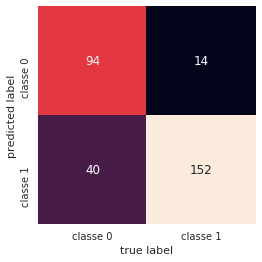

In [8]:
#Apresentação dos resultados
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=['classe 0','classe 1'], yticklabels=['classe 0','classe 1'])
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

SVM

In [9]:
# Treinamento da SVM
clf = SVC(C=100.0)
clf.fit(df_data,df_target)
y_pred= clf.predict(X_test)

# Matriz de confusão
mat = confusion_matrix(y_test, y_pred)

/home/daniel/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


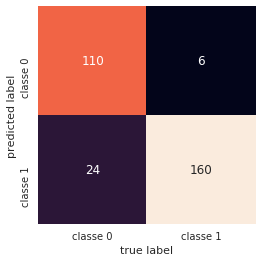

In [10]:
#Apresentação dos resultados
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=['classe 0','classe 1'], yticklabels=['classe 0','classe 1'])
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()